In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
filename = "log.txt"
df = pd.read_csv(filename, sep="|", header=None)

In [20]:
df.columns = ["time", "level", "file", "location", "contents"]

In [21]:
r = df.time.apply(lambda x: ":".join(x.split(":")[:-1]) + "." + x.split(":")[-1])

In [22]:
df.time = pd.to_datetime(r, errors="coerce")

In [23]:
cleaned_df = df[df.time.notnull()]

In [24]:
memory_df = cleaned_df[cleaned_df.contents.str.contains("WorkingSetSize", na=False, regex=False)]

In [25]:
memory_df = memory_df[["time", "contents"]]

In [26]:
working_set_size_df = memory_df[~memory_df.contents.str.contains("Peak", regex=False, na=True)]
s = working_set_size_df.contents.apply(lambda x: x.split(" ")[-1])
working_set_size_df.contents = pd.to_numeric(s, errors="coerce")
working_set_size_df = working_set_size_df[working_set_size_df.contents.notnull()]

In [27]:
peak_working_set_size_df = memory_df[memory_df.contents.str.contains("Peak", regex=False, na=False)]
t = peak_working_set_size_df.contents.apply(lambda x: x.split(" ")[-1])
peak_working_set_size_df.contents = pd.to_numeric(t, errors="coerce")
peak_working_set_size_df = peak_working_set_size_df[peak_working_set_size_df.contents.notnull()]

In [28]:
working_set_size_df.sort_values(by=["time"], inplace=True)
peak_working_set_size_df.sort_values(by=["time"], inplace=True)

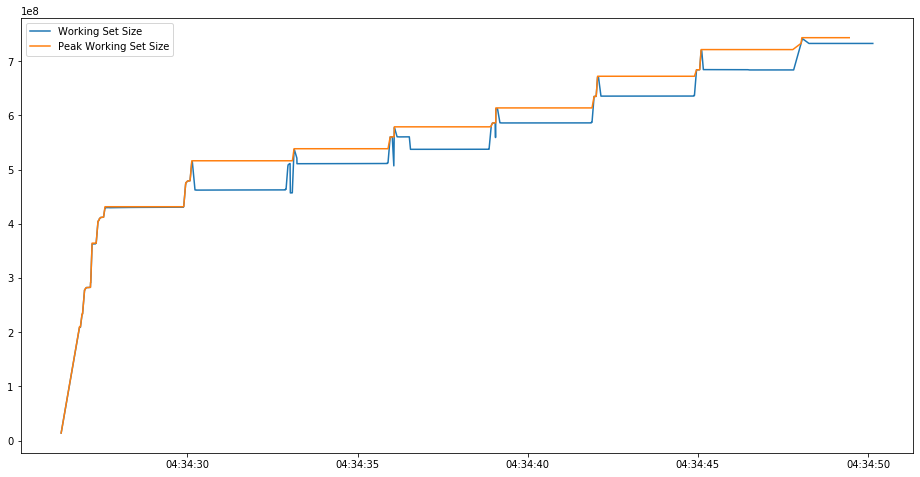

In [32]:
plt.figure(figsize=(16, 8))
plt.plot(working_set_size_df.time, working_set_size_df.contents, label="Working Set Size")
plt.plot(peak_working_set_size_df.time, peak_working_set_size_df.contents, label="Peak Working Set Size")
plt.legend(loc='best')
plt.show()